# Работа с акселерометром

Акселерометр - это прибор измеряющий проекцию кажущегося ускорения.  
Гироскоп (в рамках данной ЛР) - это прибор измеряющий проекцию угловой скорости.

В рамках данной лабораторной работы мы с вами познакомимся с этими приборами с точки зрения пользователей. И сделаем несколько записей на реальных устройствах.  
В вашем мобильном телефоне (сейчас уже практически в любом) есть набор датчиков: блок акселерометров, блок гироскопов и магнитометр. Поэтому в рамках лабораторной работы мы будем пользоваться вашим телефоном.  
Для записей воспользуемся приложением:  
https://play.google.com/store/apps/details?id=com.kelvin.sensorapp&hl=en&gl=US  
Для Apple:  
https://apps.apple.com/us/app/physics-toolbox-sensor-suite/id1128914250

В следующей ячейке написана функция для чтения файлов записей. Используйте ее для считывания файлов.

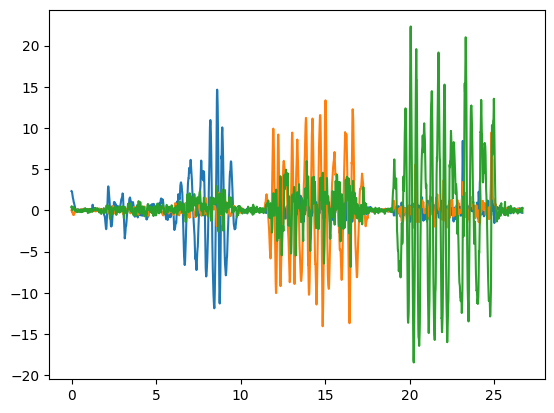

In [25]:

from matplotlib import pyplot
import csv
import math
from scipy.integrate import cumtrapz, simpson
import numpy as np


def read_csv(fname):
    time = []
    x = []
    y = []
    z = []
    init = False
    t0 = 0
    with open(fname, newline = '') as csvfile:
        datareader = csv.reader(csvfile)
        for row in datareader:
            if (len(row)>=4):
                if init:
                    if t0 == 0:
                        t0 = float(row[0])
                    time.append((float(row[0])-t0)/10e8)
                    z.append(float(row[2]))
                    y.append(float(row[3]))
                    x.append(float(row[4]))
                else:
                    init=True
    return time, x, y, z

t, x, y, z = read_csv('data1.csv')
pyplot.plot(t,x,t,y,t,z)
# pyplot.plot(t,y)
# pyplot.plot(t,z)

Сделайте запись акселерометра в которой по каждой оси блока акселерометров по очереди будет воздействовать ускорение, постройте график полученной записи.  

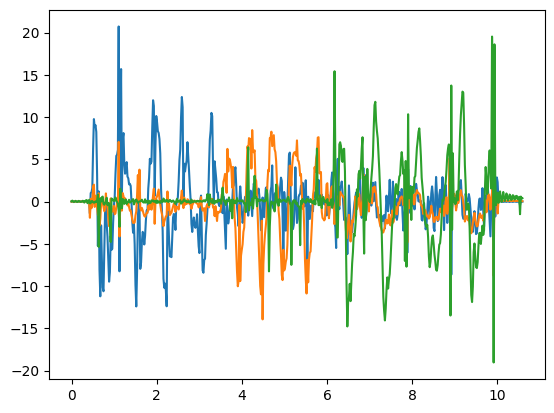

In [24]:
t, x, y, z = read_csv('Accelerometer.csv')
pyplot.plot(t,x,t,y,t,z)

На основе сделанной записи обозначте направление осей блока акселерометров на данном рисунке:  
  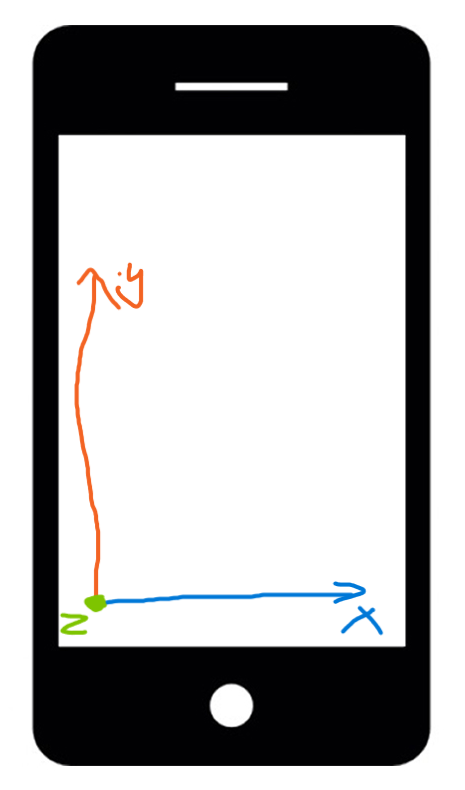


Сделайте запись данных акселерометра согласно рисунку:  
  
<img src="2Перемещение.png">  
  
Обратите внимание начальная и конечная точки движения одинаковые. Однако в среденей точке маршрута телефон так же нужно положить. Постарайтесь что бы при перемещении в горизонтальной плоскости все ускорение проецировалось только на одну ось.  
Постройте график записи получившихся ускорений.

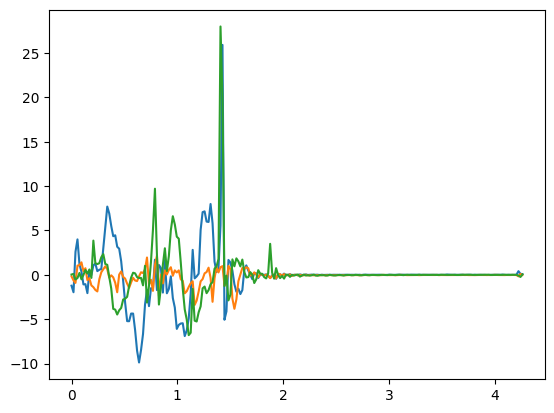

In [29]:
t, x, y, z = read_csv('Accelerometer(1).csv')
pyplot.plot(t,x,t,y,t,z)

Возьмите двойной интеграл ускорения по половине записи по оси по которой были наибольшие всплески ускорений. Возьмите двойной интеграл ускорения по полной записи с той же оси.  
Выведите результаты интегрирования.  
Постройте графики получившейся скорости и перемещения.

C:\Users\Catma\AppData\Local\Temp\ipykernel_648\1532959202.py:2: DeprecationWarning: You are passing x=[0.0, 0.01876864, 0.03753728, 0.056306176, 0.075074816, 0.093843456, 0.112612352, 0.131380992, 0.150149632, 0.168918528, 0.187687168, 0.206455808, 0.225224704, 0.243993344, 0.26276224, 0.28153088, 0.30029952, 0.31906816, 0.337837056, 0.356605696, 0.375374592, 0.394143232, 0.412911872, 0.431680768, 0.450449408, 0.469218048, 0.487986944, 0.506755584, 0.52552448, 0.54429312, 0.56306176, 0.581830656, 0.600599296, 0.619367936, 0.638136832, 0.656905472, 0.675674368, 0.694443008, 0.713211648, 0.731980544, 0.750749184, 0.76951808, 0.78828672, 0.80705536, 0.825824256, 0.844592896, 0.863361536, 0.882130432, 0.900899072, 0.919667968, 0.938436608, 0.957205248, 0.975974144, 0.994742784, 1.01351168, 1.03228032, 1.05104896, 1.069817856, 1.088586496, 1.107355392, 1.126124032, 1.144892928, 1.163661568, 1.182430208, 1.201199104, 1.219967744, 1.238736384, 1.25750528, 1.27627392, 1.295042816, 1.313811456

ValueError: x and y must have same first dimension, but have shapes (228,) and (1,)

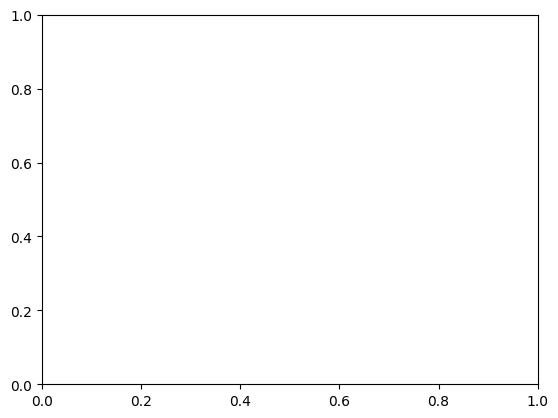

In [35]:
t, x, y, z = read_csv('Accelerometer(1).csv')
x=simpson(x,t)
y=simpson(y,t)
z=simpson(z,t)
pyplot.plot(t,z)

Опишите что получилось и почему.

*\*Задание повышенной сложности (не обязательное)*  
При помощи акселерометра сделайте запись по которой можно будет восстановить задуманный вами рисунок (начните с простого варианта квадрат/треугольник).

Выводы. Подведите итог выполненной лабораторной работы.  